In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd

# pietro
#data_weather_osm = pd.read_csv("/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/data_weather_osm.csv")
# carlo
#data_weather_osm = pd.read_csv("/content/drive/My Drive/universita/magistrale/advanced_machine_learning/Progetto AML/data_weather_osm.csv")
# marco
data_weather_osm = pd.read_csv("/content/drive/My Drive/Progetto AML/data_weather_osm.csv")

data_weather_osm = data_weather_osm.drop(columns=['date', 'id', 'pickup_datetime', 'dropoff_datetime', 'starting_street', 'end_street', 'street_for_each_step', 'distance_per_step', 'travel_time_per_step', 'step_maneuvers', 'step_direction', 'step_location_list'])

data_weather_osm.shape

(1458643, 26)

In [0]:
import numpy as np
# pickup media e std
mean_pickup_longitude = np.mean(data_weather_osm.pickup_longitude, axis=0)
std_pickup_longitude = np.std(data_weather_osm.pickup_longitude, axis=0)

mean_pickup_latitude = np.mean(data_weather_osm.pickup_latitude, axis=0)
std_pickup_latitude = np.std(data_weather_osm.pickup_latitude, axis=0)

# dropoff media e std
mean_dropoff_longitude = np.mean(data_weather_osm.dropoff_longitude, axis=0)
std_dropoff_longitude = np.std(data_weather_osm.dropoff_longitude, axis=0)

mean_dropoff_latitude = np.mean(data_weather_osm.dropoff_latitude, axis=0)
std_dropoff_latitude = np.std(data_weather_osm.dropoff_latitude, axis=0)

In [6]:
#dati che eliminiamo rispetto a pickup

multiplier = 5

data_delete_1 = data_weather_osm[data_weather_osm.pickup_longitude < mean_pickup_longitude - multiplier * std_pickup_longitude]
data_delete_2 = data_weather_osm[data_weather_osm.pickup_longitude > mean_pickup_longitude + multiplier * std_pickup_longitude]

data_delete_3 = data_weather_osm[data_weather_osm.pickup_latitude < mean_pickup_latitude - multiplier * std_pickup_latitude]
data_delete_4 = data_weather_osm[data_weather_osm.pickup_latitude > mean_pickup_latitude + multiplier * std_pickup_latitude]

data_delete = pd.concat([data_delete_1, data_delete_2, data_delete_3, data_delete_4])

data_delete = data_delete.drop_duplicates()
data_delete.shape

(315, 26)

In [7]:
import folium
m = folium.Map(location=[40.767936706543, -73.9821548461914])
number_point = 1400
for i in range(0, data_delete.shape[0]): 
  folium.CircleMarker([data_delete.iloc[i].pickup_latitude, data_delete.iloc[i].pickup_longitude], radius=1).add_to(m)
m

In [8]:
#dati che eliminiamo rispetto a dropoff

#(soglia)
multiplier = 5

data_delete_5 = data_weather_osm[data_weather_osm.dropoff_longitude < mean_dropoff_longitude - multiplier * std_dropoff_longitude]
data_delete_6 = data_weather_osm[data_weather_osm.dropoff_longitude > mean_dropoff_longitude + multiplier * std_dropoff_longitude]

data_delete_7 = data_weather_osm[data_weather_osm.dropoff_latitude < mean_dropoff_latitude - multiplier * std_dropoff_latitude]
data_delete_8 = data_weather_osm[data_weather_osm.dropoff_latitude > mean_dropoff_latitude + multiplier * std_dropoff_latitude]

data_delete = pd.concat([data_delete_5, data_delete_6, data_delete_7, data_delete_8])

data_delete = data_delete.drop_duplicates()
data_delete.shape

(973, 26)

In [9]:
import folium
m = folium.Map(location=[40.767936706543, -73.9821548461914])
for i in range(0, data_delete.shape[0]): 
  folium.CircleMarker([data_delete.iloc[i].dropoff_latitude, data_delete.iloc[i].dropoff_longitude], radius=1, color='red').add_to(m)
m

In [10]:
# elimino le tuple outlier in base a pickup_longitude
#(soglia)
multiplier = 5

data_weather_osm = data_weather_osm[data_weather_osm.pickup_longitude > mean_pickup_longitude - multiplier * std_pickup_longitude]
data_weather_osm = data_weather_osm[data_weather_osm.pickup_longitude < mean_pickup_longitude + multiplier * std_pickup_longitude]

data_weather_osm = data_weather_osm[data_weather_osm.pickup_latitude > mean_pickup_latitude - multiplier * std_pickup_latitude]
data_weather_osm = data_weather_osm[data_weather_osm.pickup_latitude < mean_pickup_latitude + multiplier * std_pickup_latitude]

# elimino le tuple outlier in base a dropoff_longitude
data_weather_osm = data_weather_osm[data_weather_osm.dropoff_longitude > mean_dropoff_longitude - multiplier * std_dropoff_longitude]
data_weather_osm = data_weather_osm[data_weather_osm.dropoff_longitude < mean_dropoff_longitude + multiplier * std_dropoff_longitude]

data_weather_osm = data_weather_osm[data_weather_osm.dropoff_latitude > mean_dropoff_latitude - multiplier * std_dropoff_latitude]
data_weather_osm = data_weather_osm[data_weather_osm.dropoff_latitude < mean_dropoff_latitude + multiplier * std_dropoff_latitude]

# con -2*std elimino 103.835
# con -3*std elimino 48.725
# con -4*str elimino 3.720
data_weather_osm.shape

(1457608, 26)

In [11]:
data_weather_osm[data_weather_osm.trip_duration >= 18000].shape[0]

2068

In [0]:
# elimino i viaggi più di lunghi di 5 ore? o li togliamo di più
data_weather_osm = data_weather_osm[data_weather_osm.trip_duration < 18000]

In [0]:
# elimino i viaggi con 0 persone sono 60
data_weather_osm = data_weather_osm[data_weather_osm.passenger_count != 0]

In [12]:
# check if there are trips with duration less than 30 seconds
data_weather_osm[data_weather_osm.trip_duration <= 30].shape[0]

4800

In [0]:
data_weather_osm = data_weather_osm[data_weather_osm.trip_duration > 30]

In [0]:
data_weather_osm.shape

(1450717, 26)

In [0]:
data_weather_osm = data_weather_osm[data_weather_osm['total_distance'] > 0]

In [0]:
data_weather_osm.shape

(1446228, 26)

In [0]:
data_weather_osm.loc[data_weather_osm.store_and_fwd_flag == 'N', 'store_and_fwd_flag'] = '0'
data_weather_osm.loc[data_weather_osm.store_and_fwd_flag == 'Y', 'store_and_fwd_flag'] = '1'


In [0]:
# si può provare ad eliminare le coordinate gps
data_weather_osm= data_weather_osm.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

In [0]:
data_weather_osm.shape

(1446228, 22)

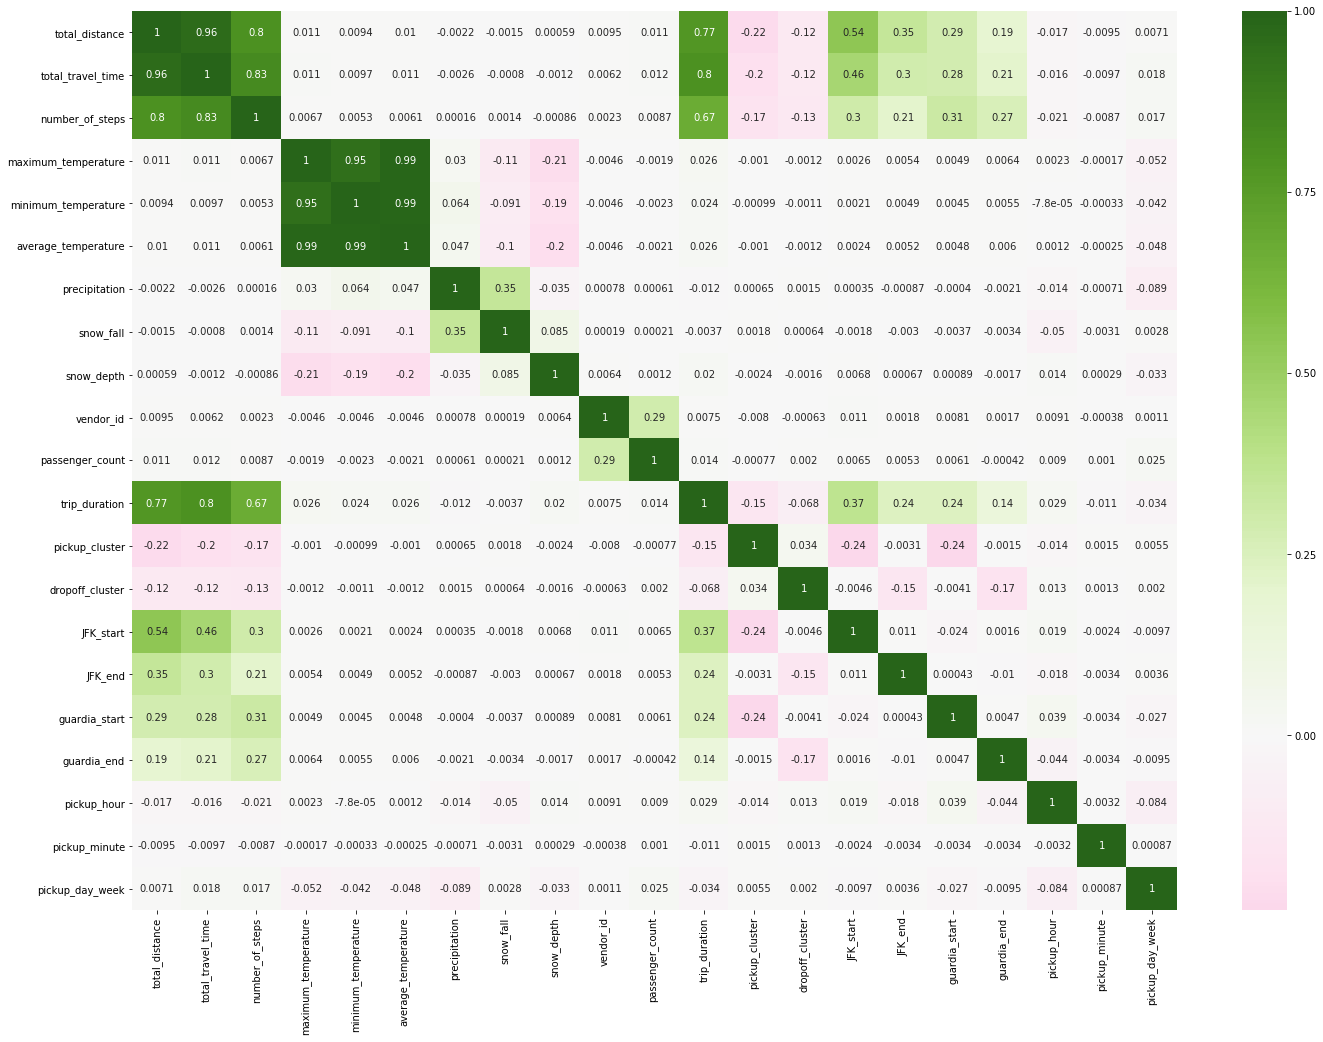

In [0]:
#matrice di correlazione
import seaborn as sn
from matplotlib import pyplot
corrMatrix = data_weather_osm.corr()

fig, ax = pyplot.subplots(figsize=(23.4, 16.54))
ax = sn.heatmap(corrMatrix, annot=True, cmap="PiYG", center=0)
pyplot.show()
ax.get_figure().savefig('/content/correlation.png')


In [0]:
data_weather_osm.to_csv('output_preprocessing.csv', index=False)
!cp /content/output_preprocessing.csv "/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/"
#!cp /content/output_preprocessing.csv "/content/drive/My Drive/universita/magistrale/advanced_machine_learning/Progetto AML/"